# Per-embedding word alignemt check

We check if some of the pre-trained model is able to produce embeddings that are cross-lingually aligned.
This would be useful for no-reference evaluation and critical error identification (that we'll also evluate this on).

In [7]:
import pandas as pd

df = pd.read_csv("data_dir/encs_majority_dev.tsv", sep="\t", names=["en", "cs", "judgements", "is_critical"])

In [8]:
df.head()

,en,cs,judgements,is_critical
2601,I think he has a strong relation with second b...,"Myslím , že má silný vztah s druhým dechem pro...","[0, 0, 0]",NOT
2095,"It is, after all, one of - possibly even the f...","Koneckonců je to jedna z - možná i první , jak...","[1, 0, 0]",NOT
8392,"Mel, they were already cited. We went to great...","Mel , oni už byli citováni . Dělali jsme velké...","[0, 0, 0]",NOT
9890,"The IP was doing good, I thought it was adding...","IP se mi dařilo dobře , myslela jsem , že to j...","[0, 0, 1]",NOT
6079,Knock of the vandlism or i'll report your fuck...,"Zmáčkni ten vandlismus , nebo ti nahlásím tvou...","[1, 1, 1]",ERR


## Check if the multilingual bert embeddings are cross-lingual by default

In [1]:
from embedder import ContextualEmbedder
embedder = ContextualEmbedder(lang="cs")

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/996k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/714M [00:00<?, ?B/s]

In [13]:
[df.en.iloc[0]]

["I think he has a strong relation with second breath program from Moldova. That's why his POV to destroy the articles."]

In [91]:
text_en, text_cs = df.en.iloc[0], df.cs.iloc[0]

tokens_en, embeddings_en = embedder.tokenize_embed([df.en.iloc[0]])
tokens_cs, embeddings_cs = embedder.tokenize_embed([df.cs.iloc[0]])

[CLS] I think he has a strong relation with second br ##eath program from Moldova . That ' s why his P ##O ##V to destroy the articles . [SEP]
[CLS] My ##sl ##ím , že má sil ##ný v ##zta ##h s druhý ##m de ##chem programu z Mol ##da ##vska . Proto jeho P ##O ##V z ##ni ##čit č ##lán ##ky . [SEP]


<AxesSubplot:>

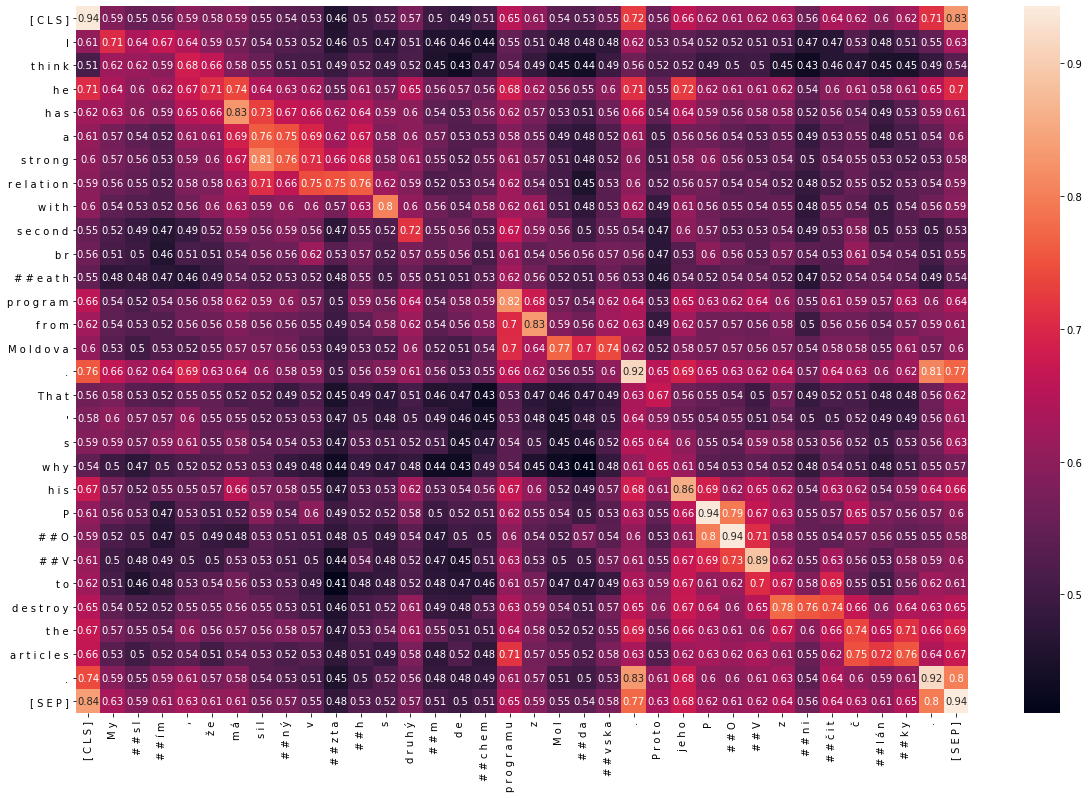

In [92]:
# OK translation:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

fig, ax = plt.subplots(figsize=(20,13))

print(" ".join([t.replace(" ", "") for t in tokens_en[0]]))
print(" ".join([t.replace(" ", "") for t in tokens_cs[0]]))

sims = cosine_similarity(embeddings_en[0], embeddings_cs[0])
sns.heatmap(pd.DataFrame(sims, index=tokens_en[0], columns=tokens_cs[0]), annot=True, ax=ax)

[CLS] K ##nock of the vand ##lis ##m or i ' ll report your fu ##cking dum ##ass [SEP]
[CLS] Z ##má ##č ##k ##ni ten vand ##lis ##mus , nebo ti nah ##lás ##ím tv ##ou za ##sr ##ano ##u dum ##ass . [SEP]


<AxesSubplot:>

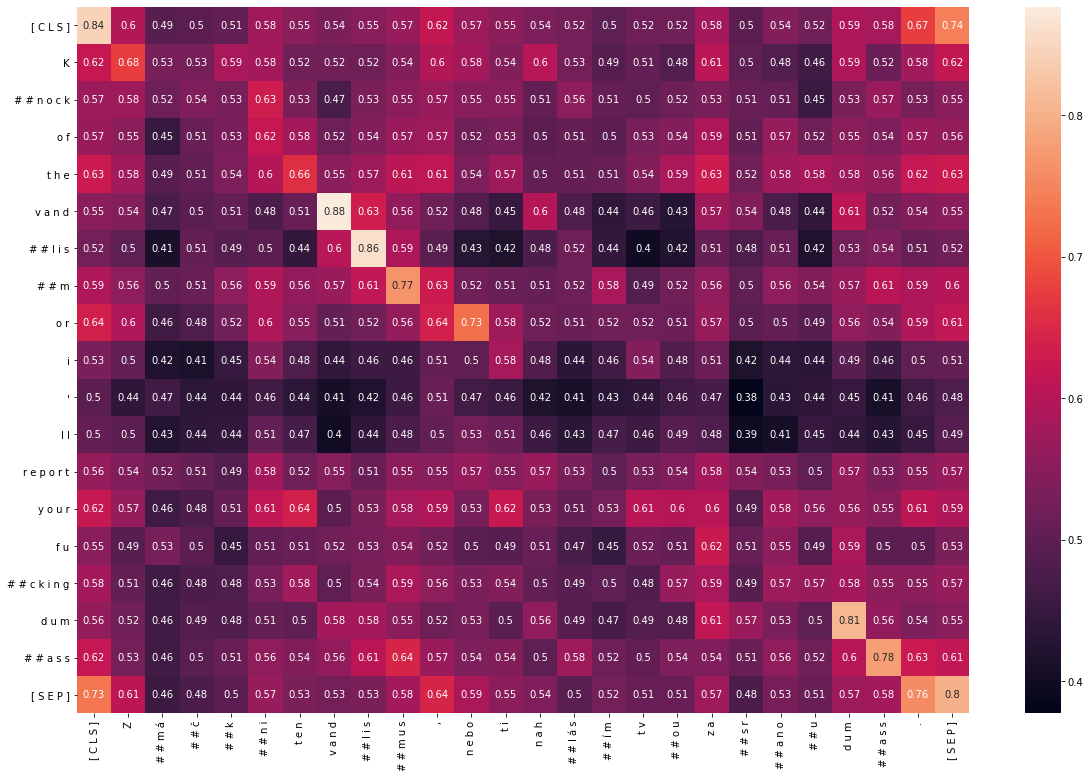

In [90]:
# Critical translation error:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

fig, ax = plt.subplots(figsize=(20,13))

print(" ".join([t.replace(" ", "") for t in tokens_en[0]]))
print(" ".join([t.replace(" ", "") for t in tokens_cs[0]]))

sims = cosine_similarity(embeddings_en[0], embeddings_cs[0])
sns.heatmap(pd.DataFrame(sims, index=tokens_en[0], columns=tokens_cs[0]), annot=True, ax=ax)

[CLS] I think he has a strong relation with second br ##eath program from Moldova . That ' s why his P ##O ##V to destroy the articles . [SEP]
[CLS] My ##sl ##ím , že má sil ##ný v ##zta ##h s druhý ##m de ##chem programu z Mol ##da ##vska . Proto jeho P ##O ##V z ##ni ##čit č ##lán ##ky . [SEP]


<AxesSubplot:>

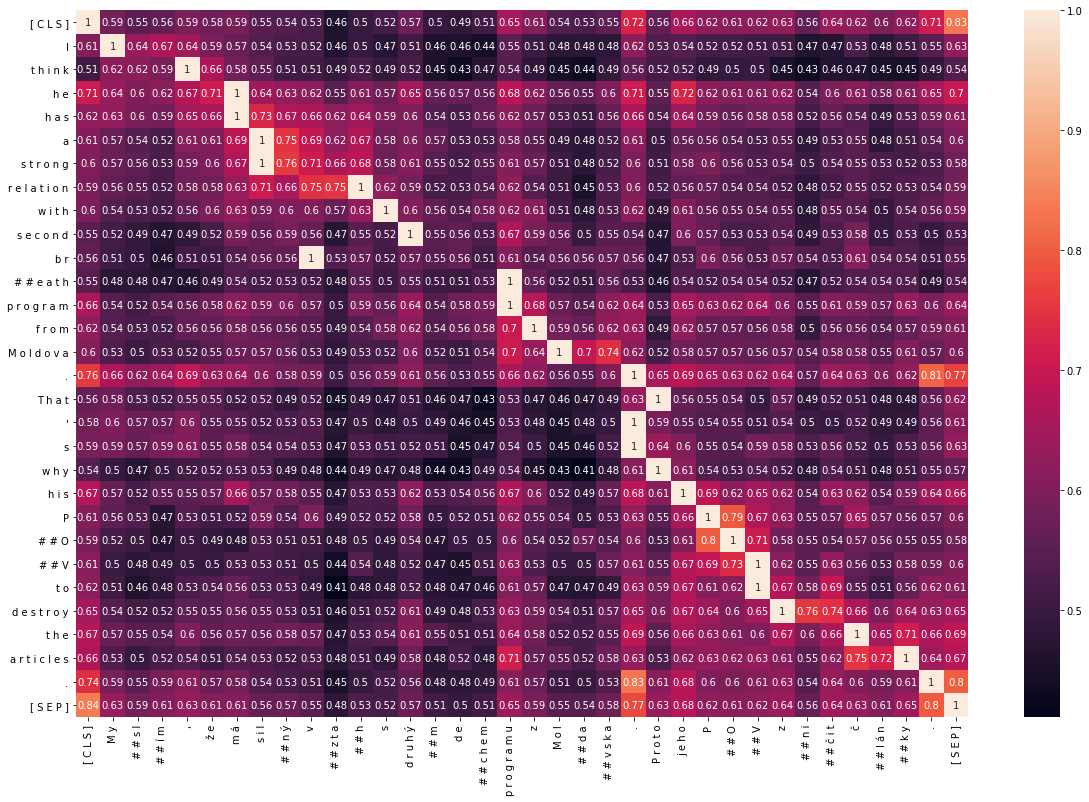

In [88]:
sims = cosine_similarity(embeddings_en[0], embeddings_cs[0])
sims_df = pd.DataFrame(sims, index=tokens_en[0], columns=tokens_cs[0])
sims_df.iloc[range(sims_df.shape[0]), sims_df.values.argmax(axis=1)] = 1

print(" ".join([t.replace(" ", "") for t in tokens_en[0]]))
print(" ".join([t.replace(" ", "") for t in tokens_cs[0]]))

fig, ax = plt.subplots(figsize=(20,13))
sns.heatmap(sims_df, annot=True, ax=ax)

In [41]:
pd.DataFrame({"en": tokens_en[0] + [""]*(len(tokens_cs[0])-len(tokens_en[0])), "cs": tokens_cs[0]})

,en,cs
0,[ C L S ],[ C L S ]
1,I,M y
2,t h i n k,# # s l
3,h e,# # í m
4,h a s,","
5,a,ž e
6,s t r o n g,m á
7,r e l a t i o n,s i l
8,w i t h,# # n ý
9,s e c o n d,v


In [48]:
sims.argmax(axis=1)

array([ 0,  1,  4,  6,  6,  7,  7, 11, 12, 13,  9, 17, 17, 18, 19, 22, 23,
       22, 22, 23, 24, 25, 26, 27, 27, 28, 31, 33, 34, 35])

In [26]:
# for each english token, show the best-matching czech one
for idx_en, idx_cs in enumerate(sims.argmax(axis=1)):
    print("%s -> %s: sim=%s\n" % (tokens_en[0][idx_en], tokens_cs[0][idx_cs], sims[idx_en, idx_cs]))

[ C L S ] -> [ C L S ]: sim=0.9366126

I -> M y: sim=0.70532274

t h i n k -> ,: sim=0.6809627

h e -> m á: sim=0.73822004

h a s -> m á: sim=0.8269588

a -> s i l: sim=0.7612377

s t r o n g -> s i l: sim=0.806475

r e l a t i o n -> # # h: sim=0.7599957

w i t h -> s: sim=0.8032869

s e c o n d -> d r u h ý: sim=0.716225

b r -> v: sim=0.6170005

# # e a t h -> p r o g r a m u: sim=0.62324005

p r o g r a m -> p r o g r a m u: sim=0.8207957

f r o m -> z: sim=0.83392173

M o l d o v a -> M o l: sim=0.7697123

. -> .: sim=0.91532236

T h a t -> P r o t o: sim=0.6692865

' -> .: sim=0.63653874

s -> .: sim=0.6466806

w h y -> P r o t o: sim=0.64829654

h i s -> j e h o: sim=0.8560794

P -> P: sim=0.9402094

# # O -> # # O: sim=0.9383595

# # V -> # # V: sim=0.8870801

t o -> # # V: sim=0.70311636

d e s t r o y -> z: sim=0.77589697

t h e -> č: sim=0.7365905

a r t i c l e s -> # # k y: sim=0.7553586

. -> .: sim=0.9174865

[ S E P ] -> [ S E P ]: sim=0.94274116



In [16]:
len(tokens_en[0]), len(embeddings_en[0])

(30, 30)

## Check this for models trained on Translation Language Modeling (TLM)

#### TODO: we do not know how to compare models on this task. We'll do this in end-to-end evaluation when judgements are ready